<IPython.core.display.Javascript object>


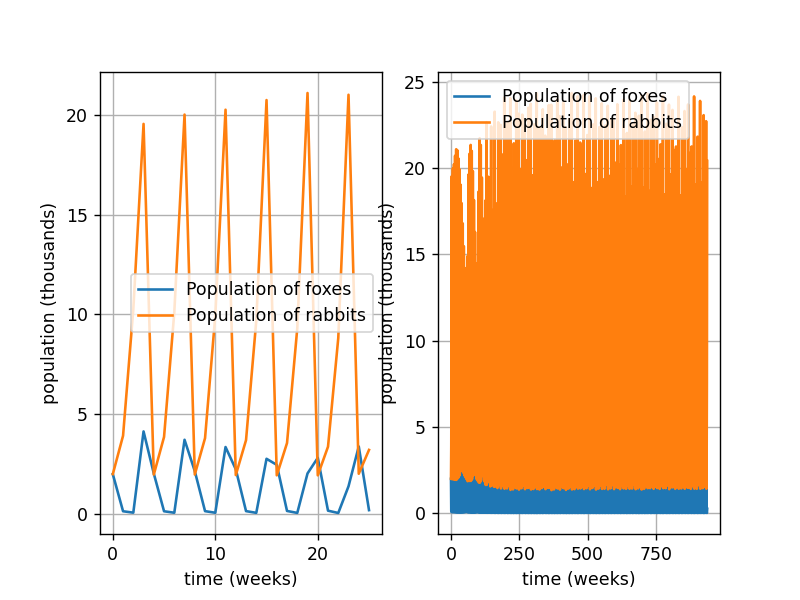

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from numpy import *
import pylab as p
from scipy import integrate


y0 = [2,2] # [rabbit, box]

t0, tf = 0.0, 25.0
t = np.linspace(t0, tf, 26)
t0l, tfl = 0.0, 938.214
tl = np.linspace(t0l, tfl, 939)

alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 4.0

params = [alpha, beta, gamma, delta]
 
def sim(t, variables, params):
    
    #rabbit population level
    x = variables[0]
    
    # fox population level
    y = variables[1]
    
    
    alpha = params[0]
    beta = params[1]
    gamma = params[2]
    delta = params[3]
    
    dxdt = alpha * x - beta * x * y
    dydt = gamma * x * y - delta * y
    
    return([dxdt, dydt])


y = solve_ivp(sim, [t0, tf], y0, t_eval=t, args=(params,))
yl = solve_ivp(sim, [t0l, tfl], y0, t_eval=tl, args=(params,))

r, f = y.y
rl, fl = yl.y

f1 = p.figure()
plt.subplot(1, 2, 1)
p.plot(t, f, label='Population of foxes')
p.plot(t, r, label='Population of rabbits')
p.grid()
p.legend(loc='best')
p.xlabel('time (weeks)')
p.ylabel('population (thousands)')
#p.title('Evolution of fox and rabbit populations')
plt.subplot(1, 2, 2)
p.plot(tl, fl, label='Population of foxes')
p.plot(tl, rl, label='Population of rabbits')
p.grid()
p.legend(loc='best')
p.xlabel('time (weeks)')
p.ylabel('population (thousands)')
#p.title('Evolution of fox and rabbit populations')
f1.savefig('2_1(a).png')